In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
df = pd.read_csv('/content/drive/MyDrive/face_emotion/Dataset/fer2013plusnew.csv')
df.head()

,emotion,pixels,Usage
0,0,30 24 21 23 25 25 49 67 84 103 120 125 130 139...,Training
1,0,123 125 124 142 209 226 234 236 231 232 235 22...,Training
2,0,236 230 225 226 228 209 199 193 196 211 199 19...,Training
3,0,255 82 0 3 0 0 0 0 0 0 3 0 16 17 3 60 29 0 1 2...,Training
4,0,206 208 209 212 214 216 216 219 221 222 222 22...,Training


In [4]:
df['emotion'].value_counts()

6    12905
3     9355
5     4462
4     4370
0     3110
2      819
1      248
7      216
Name: emotion, dtype: int64

In [5]:
"""
# mapping into positive, negative, neutral
# Create a dictionary to define the class mapping
class_mapping = {
    3: 0,  # happiness (Positive)
    5: 0,  # surprise (Positive)
    6: 1,  # Neutral
    0: 2,  # anger (Negative)
    1: 2,  # disgust (Negative)
    2: 2,  # fear (Negative)
    4: 2,  # sadness (Negative)
    7: 2,  # contemp (Negative)
}

# Map the 'emotion' column
#df['emotion'] = df['emotion'].map(class_mapping)
"""

"\n# mapping into positive, negative, neutral\n# Create a dictionary to define the class mapping\nclass_mapping = {\n    3: 0,  # happiness (Positive)\n    5: 0,  # surprise (Positive)\n    6: 1,  # Neutral\n    0: 2,  # anger (Negative)\n    1: 2,  # disgust (Negative)\n    2: 2,  # fear (Negative)\n    4: 2,  # sadness (Negative)\n    7: 2,  # contemp (Negative)\n}\n\n# Map the 'emotion' column\n#df['emotion'] = df['emotion'].map(class_mapping)\n"

In [6]:
df.head()

,emotion,pixels,Usage
0,0,30 24 21 23 25 25 49 67 84 103 120 125 130 139...,Training
1,0,123 125 124 142 209 226 234 236 231 232 235 22...,Training
2,0,236 230 225 226 228 209 199 193 196 211 199 19...,Training
3,0,255 82 0 3 0 0 0 0 0 0 3 0 16 17 3 60 29 0 1 2...,Training
4,0,206 208 209 212 214 216 216 219 221 222 222 22...,Training


In [7]:
df['emotion'].value_counts()

6    12905
3     9355
5     4462
4     4370
0     3110
2      819
1      248
7      216
Name: emotion, dtype: int64

In [8]:
#df.to_csv('fer2013plusnew_3class.csv', index=False)

In [6]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral', 7: 'contempt'}  #original
#label_to_text = {0:'positive', 1:'neutral', 2:'negative'}  #edit

In [7]:
img_array = df['pixels'].apply(lambda x: np.array(x.split(" ")).reshape(48,48,1).astype('float32'))
img_array = np.stack(img_array, axis=0)
labels = df.emotion.values

In [8]:
img_array.shape

(35485, 48, 48, 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size= .2, random_state=42, stratify=labels)
#X_train, X_temp, y_train, y_temp = train_test_split(img_array, labels, test_size=0.4, random_state=42, stratify=labels)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [10]:
#X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28388, 48, 48, 1), (28388,), (7097, 48, 48, 1), (7097,))

In [11]:
X_train = X_train/255
#X_val = X_test/255
X_test = X_test/255

In [12]:
batch_size = 16
"""
# Define the ImageDataGenerator for data augmentation for training data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Create a generator for training data
train_generator = train_datagen.flow(X_train, y_train,
                                     batch_size=batch_size)

# Define a separate ImageDataGenerator for val and test data (no data augmentation)
datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_generator = datagen.flow(X_val, y_val,
                                    batch_size=batch_size)
test_generator = datagen.flow(X_test, y_test,
                              batch_size=batch_size)

"""

"\n# Define the ImageDataGenerator for data augmentation for training data\ntrain_datagen = tf.keras.preprocessing.image.ImageDataGenerator(\n    rotation_range=20,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    horizontal_flip=True,\n    zoom_range=0.2,\n    shear_range=0.2,\n    fill_mode='nearest'\n)\n\n# Create a generator for training data\ntrain_generator = train_datagen.flow(X_train, y_train, \n                                     batch_size=batch_size)\n\n# Define a separate ImageDataGenerator for val and test data (no data augmentation)\ndatagen = tf.keras.preprocessing.image.ImageDataGenerator()\nval_generator = datagen.flow(X_val, y_val, \n                                    batch_size=batch_size)\ntest_generator = datagen.flow(X_test, y_test, \n                              batch_size=batch_size)\n                              \n"

In [13]:
num_classes = 8

basemodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [14]:
basemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 256)         0

In [15]:
initial_learning_rate = 0.0001  # You can adjust this value
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=initial_learning_rate)
optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
basemodel.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
def lr_schedule(epoch):
    if epoch < 10:
        return initial_learning_rate
    else:
        return initial_learning_rate * 0.1

In [17]:
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

In [18]:
file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)


call_back = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                        monitor='val_accuracy',
                                        verbose=1,
                                        save_freq='epoch',
                                        save_best_only=True,
                                        save_weights_only=False,
                                        mode='max'),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    #tf.keras.callbacks.LearningRateScheduler(lr_schedule)
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=0.000001)
]

In [19]:
#history = basemodel.fit(train_generator,
#                        epochs=100,
#                        validation_data=val_generator,
#                        callbacks=call_back)

history = basemodel.fit(X_train, y_train,
                        epochs=100,
                        batch_size=batch_size,
                        validation_split=.2,
                        callbacks=call_back)

Epoch 1/100
1420/1420 [==============================] - ETA: 0s - loss: 1.6685 - accuracy: 0.3490
Epoch 1: val_accuracy improved from -inf to 0.38429, saving model to checkpoint/best_model.h5
1420/1420 [==============================] - 22s 7ms/step - loss: 1.6685 - accuracy: 0.3490 - val_loss: 1.5765 - val_accuracy: 0.3843 - lr: 1.0000e-04
Epoch 2/100
  22/1420 [..............................] - ETA: 6s - loss: 1.5728 - accuracy: 0.3949

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1417/1420 [============================>.] - ETA: 0s - loss: 1.4846 - accuracy: 0.4541
Epoch 2: val_accuracy improved from 0.38429 to 0.54826, saving model to checkpoint/best_model.h5
1420/1420 [==============================] - 9s 6ms/step - loss: 1.4842 - accuracy: 0.4543 - val_loss: 1.2981 - val_accuracy: 0.5483 - lr: 1.0000e-04
Epoch 3/100
1413/1420 [============================>.] - ETA: 0s - loss: 1.2978 - accuracy: 0.5562
Epoch 3: val_accuracy improved from 0.54826 to 0.60092, saving model to checkpoint/best_model.h5
1420/1420 [==============================] - 10s 7ms/step - loss: 1.2969 - accuracy: 0.5565 - val_loss: 1.1551 - val_accuracy: 0.6009 - lr: 1.0000e-04
Epoch 4/100
1418/1420 [============================>.] - ETA: 0s - loss: 1.1810 - accuracy: 0.5982
Epoch 4: val_accuracy improved from 0.60092 to 0.63473, saving model to checkpoint/best_model.h5
1420/1420 [==============================] - 10s 7ms/step - loss: 1.1809 - accuracy: 0.5981 - val_loss: 1.0572 - val_accura

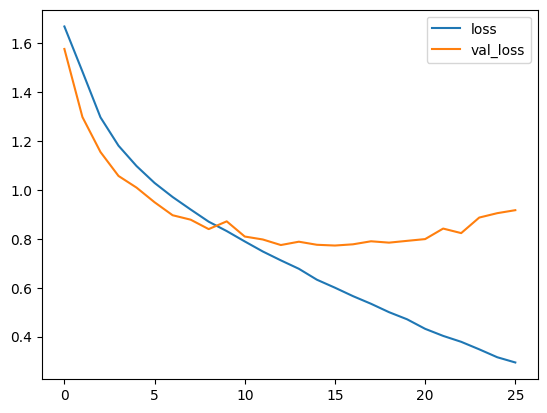

In [20]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

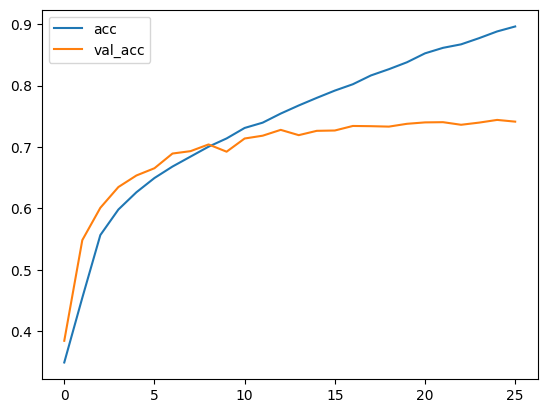

In [21]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

222/222 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

       anger     0.6485    0.5932    0.6196       622
     disgust     0.0000    0.0000    0.0000        50
        fear     0.6304    0.1768    0.2762       164
   happiness     0.8319    0.8119    0.8217      1871
     sadness     0.6093    0.3284    0.4268       874
    surprise     0.7269    0.8117    0.7669       892
     neutral     0.6965    0.8605    0.7698      2581
    contempt     0.0000    0.0000    0.0000        43

    accuracy                         0.7255      7097
   macro avg     0.5179    0.4478    0.4601      7097
weighted avg     0.7104    0.7255    0.7063      7097

Confusion matrix, without normalization
[[ 369    0    0   35   24   43  151    0]
 [  18    0    0    2   11    0   19    0]
 [   5    0   29   20    2   84   24    0]
 [  59    0    1 1519   31   43  218    0]
 [  44    0    5   82  287   34  422    0]
 [  17    0    2   44    7  724   98   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


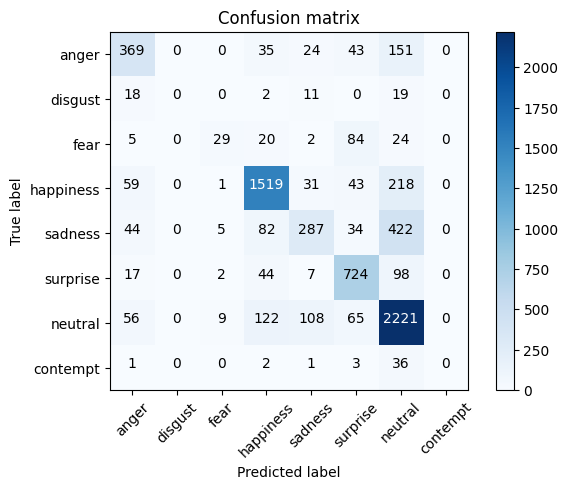

In [22]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

#label_to_text = {0:'positive', 1:'neutral', 2:'negative'}
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral', 7:'contempt'}  #original


p_test = basemodel.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
cr = classification_report(y_test, p_test, target_names=['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral', 'contempt'], digits=4)
print(cr)
plot_confusion_matrix(cm, list(label_to_text.values()))

In [23]:
checkpoint_path

'checkpoint/best_model.h5'

actual label is sadness
1/1 [==============================] - 0s 19ms/step
predicted label is sadness


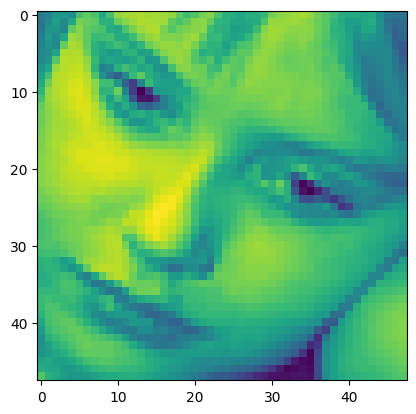

In [24]:
final_model = tf.keras.models.load_model(checkpoint_path)
from IPython.display import clear_output
import time

for k in range(40):
        print(f'actual label is {label_to_text[y_test[k]]}')
        predicted_class = final_model.predict(tf.expand_dims(X_test[k],0)).argmax()
        print(f'predicted label is {label_to_text[predicted_class]}')
        plt.imshow(X_test[k].reshape((48,48)))
        plt.show()
        time.sleep(3)
        clear_output(wait=True)